# Flash-X simulation results for Benchmark Case #1 

In [1]:
import os
import itertools
from types import SimpleNamespace
import numpy
import matplotlib.pyplot as pyplot
from scipy.interpolate import make_interp_spline
import LocalModule

In [2]:
DsetDirs, FileTags = LocalModule.case1_refinement_dict()
Results = dict()
for key in DsetDirs:
    Datasets = LocalModule.read_datasets(DsetDirs[key], FileTags[key])
    Results[key] = numpy.array([LocalModule.process_dataset(Dataset) for Dataset in Datasets])

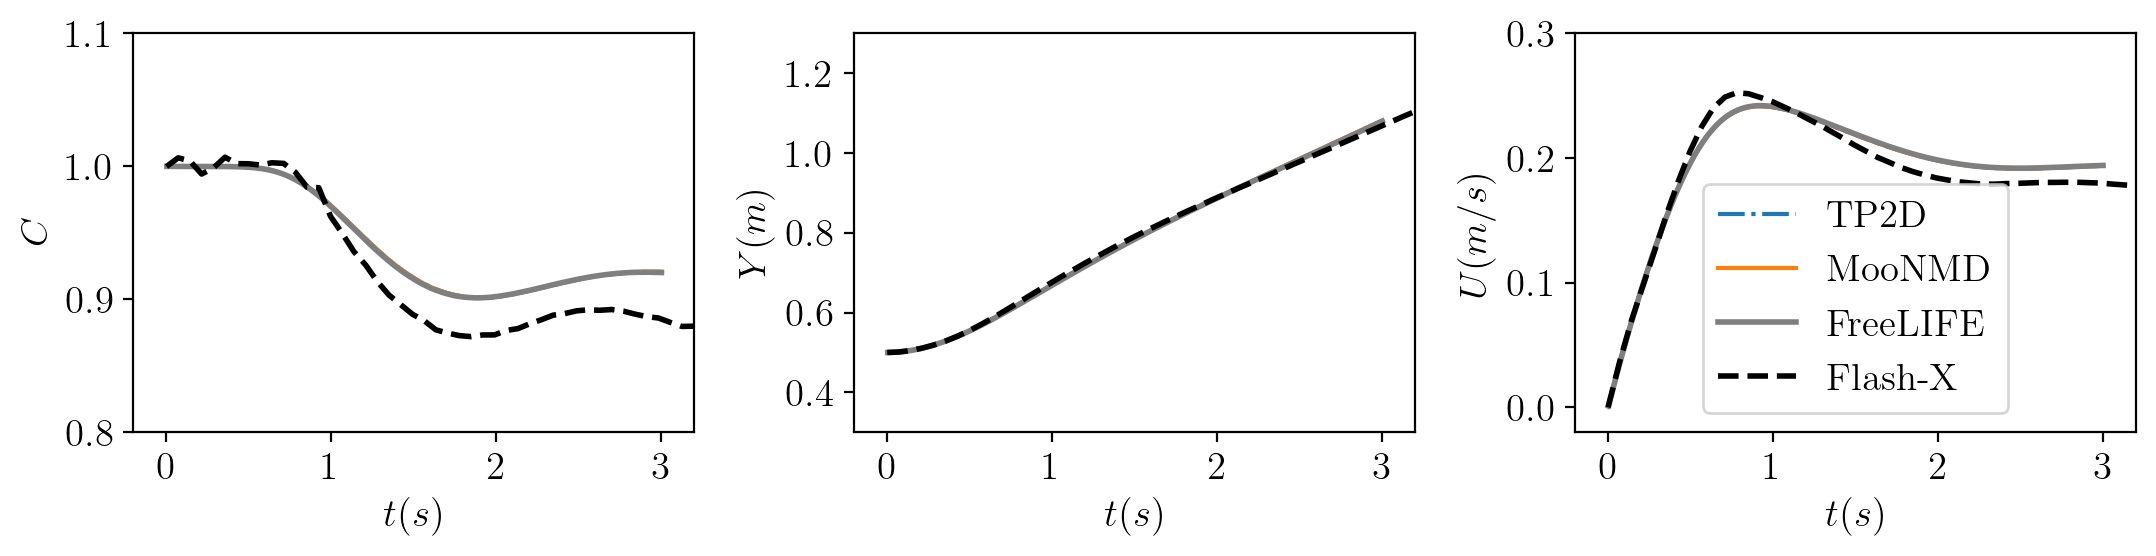

In [3]:
Reference1 = numpy.loadtxt("Benchmarks/Reference/data_bench_quantities/c1g1l7.txt")
Reference2 = numpy.loadtxt("Benchmarks/Reference/data_bench_quantities/c1g2l3.txt")
Reference3 = numpy.loadtxt("Benchmarks/Reference/data_bench_quantities/c1g3l4.txt")
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

QuantIndex = [2, 3, 4]
Figure, PlotList = pyplot.subplots(1, len(QuantIndex), figsize=(11,3), dpi=200)

for Plot, Index in zip(PlotList, QuantIndex):

    Linestyle = itertools.cycle(("--","-.", ":", "-"))
    Colors = itertools.cycle(("black","tab:red","tab:green","tab:blue"))
    Linewidths = itertools.cycle((2,2,1,2))

    Plot.plot(Reference1[:,0], Reference1[:,Index], "-.")
    Plot.plot(Reference3[:,0], Reference3[:,Index])
    Plot.plot(Reference2[:,0], Reference2[:,Index], linewidth=2, color='tab:gray')
              #marker='s', markevery=30, markersize=8, color='tab:gray')
    
    for key in ["Case1/h320"]:
        #spline = make_interp_spline(Results[key][:,0]*LocalModule.SIM_SCALE[0], 
        #                            Results[key][:,Index]*LocalModule.SIM_SCALE[Index])
        
        #time = numpy.linspace(0,3,300)
        
        Plot.plot(Results[key][:,0]*LocalModule.SIM_SCALE[0], 
                  Results[key][:,Index]*LocalModule.SIM_SCALE[Index], 
                  linewidth=next(Linewidths), linestyle=next(Linestyle), color=next(Colors))

    if Index == 2:
        Plot.set_ylim([0.8,1.1])
        Plot.set_ylabel(r"$C$", rotation=90)
    elif Index == 3:
        Plot.set_ylim([0.3,1.3])
        Plot.set_ylabel(r"$Y (m)$", rotation=90)
    elif Index == 4:
        Plot.set_ylim([-0.02,0.3])
        Plot.set_ylabel(r"$U (m/s)$", rotation=90)
        
    Plot.set_xlim([-0.2,3.2])
    Plot.set_xlabel(r"$t(s)$")

pyplot.legend(["TP2D", "MooNMD", "FreeLIFE", "Flash-X"])
pyplot.tight_layout()
#pyplot.savefig("/Users/Akash/Desktop/fig.png")
pyplot.show()